--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------
# 🚨 **USER SETUP - INPUT REQUIRED** 🚨

## **User Input for the Search Keywords in Twitter Data Scraper** 🐦
We import the `TwiKit` library, which will allow you to scrape tweets from Twitter based on specific keywords. You will need to input your wished search keywords + amount of tweets to customize this scraping process. 

You can modify these keywords to any terms of your choice, as they are not limited to the provided examples.

- **Keywords**: We have included the following keywords as examples:
  - 'Novo Nordisk' 
  - 'Ozempic'
  - 'WeGovy' 

- Make sure to write the search keywords inside the [ ] and use '' around the words, seperate by , 
- **Example:** `['Novo Nordisk', 'Ozempic', 'WeGovy']` - customize in the code cell below

- **Tweets per Keyword**: The script is set to collecting **20 tweets at a time** during each search. And as standard to retrieve **250 tweets** for each keyword you specify, you can change the amount of maximum tweets for each keywords, but please note the Usage limtations below. 📊 

- **IMPORTANT: Usage limitations:** 🚨 The Twitter API has a limit of **50 requests per 15 minutes**. Since we fetch **20 tweets at a time**, you can retrieve a maximum of **1000 tweets** every 15 minutes. You should manage your requests accordingly to avoid hitting the rate limit. **The Rate Limit resets every 15 minutes**.

## **Together API Key 🚀**: 
#### You must provide your **Together API Key** in the designated variable (`TOGETHER_API_KEY`). This key is essential for creating the Network Analysis later 🔑
- Processing of 750 tweets costs aprox. 0.03 dollars in total (so you will have plenty of processings before running out!)

### Get a free 5$ account here (no credit card required 💳 ❌): [Sign in to Together API](https://api.together.ai/signin)
- **IMPORTANT: However - it is recommended to add your credit card to your account, since it will increase the rate limit per minut when processing through Together API from 60 to 600**

--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------

In [ ]:
## Twitter Data Scrapper
keywords = ['Novo Nordisk', 'Ozempic', 'WeGovy']
tweets_per_keyword = 250

# Set your Together API Key directly (Required)
TOGETHER_API_KEY = ""

--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------

## Installation, Import Libraries + Data, Cleaning & Descriptive Statistics  📦

### Install Requirements 🎛️

In [1]:
!pip install -r requirements.txt -q

### Importing Libraries 🔌

In [ ]:

# Datahandling
import requests
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"
import re
import numpy as np
import pandas as pd
import seaborn as sns
import contractions

# Data Scrapper
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time
import nest_asyncio
import asyncio
from twikit import Client
import logging
from datetime import datetime
from IPython.display import clear_output

# Tweet Themes & EDA
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as sp
import nltk
nltk.download('stopwords', quiet=True)
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from scipy.stats import chi2_contingency
from textblob import TextBlob

# Model prediction
from setfit import SetFitModel, SetFitTrainer
from sklearn.metrics import classification_report
import tqdm

# LLM & Analysis
import tiktoken
from concurrent.futures import ThreadPoolExecutor
from queue import Queue
import threading
from typing import List, Optional
import json
import matplotlib.patches as mpatches
import networkx as nx
from community import community_louvain
import plotly.graph_objects as go
import random
from collections import defaultdict
import nbformat
from pydantic import BaseModel, Field
from openai import OpenAI
import textwrap


### Data Import 📨

In [3]:
# Data import: 
data = pd.read_csv('TwitterData_Joined.csv')

### Data Overview 🌎

In [5]:
data.head()

,Twitter_User_Name,Twitter_Account,Twitter_User_Description,Tweet_id,Tweet_created_at,Tweet_text,Label,Word_Count,Url_Count,Retweet,...,Adverb_Count,Positive_Word_Ratio,Negative_Word_Ratio,Neutral_Word_Ratio,Following,Followers,Verified,Link,Location,Real_Location
0,Museum Bot,MuseumBot,I am a bot that tweets a random high-res Open ...,8.027580e+17,27-11-2016 06:15,Imperial Theatrical Coat for Court Lady https:...,0,8,2,0,...,0,0.000,0.0,1.000,0,7816,0,https://twitter.com/MuseumBot?s=20,NaN,-1.0
1,Museum Bot,MuseumBot,I am a bot that tweets a random high-res Open ...,8.746920e+17,13-06-2017 18:15,Half-length Figure of St Paul in an Oval. http...,0,10,2,0,...,0,0.000,0.0,1.000,0,7816,0,https://twitter.com/MuseumBot?s=20,NaN,-1.0
2,Museum Bot,MuseumBot,I am a bot that tweets a random high-res Open ...,6.983900e+17,13-02-2016 06:15,Great Exhibition Jurors&amp;#39; Medal https:/...,0,6,2,0,...,0,0.125,0.0,0.875,0,7816,0,https://twitter.com/MuseumBot?s=20,NaN,-1.0
3,Museum Bot,MuseumBot,I am a bot that tweets a random high-res Open ...,6.976650e+17,11-02-2016 06:15,Pair of candelabra https://t.co/KYopSWDSw2 htt...,0,5,2,0,...,0,0.000,0.0,1.000,0,7816,0,https://twitter.com/MuseumBot?s=20,NaN,-1.0
4,Museum Bot,MuseumBot,I am a bot that tweets a random high-res Open ...,6.217450e+17,16-07-2015 18:15,Banner (Nobori)\n http://t.co/yz34Xgo9a5 http:...,0,4,2,0,...,0,0.000,0.0,1.000,0,7816,0,https://twitter.com/MuseumBot?s=20,NaN,-1.0


In [6]:
data.shape

(279691, 29)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279691 entries, 0 to 279690
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Twitter_User_Name         279691 non-null  object 
 1   Twitter_Account           279691 non-null  object 
 2   Twitter_User_Description  276027 non-null  object 
 3   Tweet_id                  279691 non-null  float64
 4   Tweet_created_at          279691 non-null  object 
 5   Tweet_text                279691 non-null  object 
 6   Label                     279691 non-null  int64  
 7   Word_Count                279691 non-null  int64  
 8   Url_Count                 279691 non-null  int64  
 9   Retweet                   279691 non-null  int64  
 10  Original_User             58391 non-null   object 
 11  Mentions_Count            279691 non-null  int64  
 12  Hashtags_Count            279691 non-null  int64  
 13  QuesMark_Count            279691 non-null  i

### Cleaning data (for now...) 🧹

In [8]:
columns_to_fill = ['Twitter_User_Description', 'Link', 'Location', 'Original_User']

data[columns_to_fill] = data[columns_to_fill].fillna(0)

### Descriptive Statistics 📊

In [ ]:
# quantitive column filtering using dtypes
quantitative_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Format the describe output to show regular numbers
desc_stats = data[quantitative_columns].describe()
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print("\nDescriptive Statistics:")
desc_stats


Descriptive Statistics:


,Tweet_id,Label,Word_Count,Url_Count,Retweet,Mentions_Count,Hashtags_Count,QuesMark_Count,Exclamations_Count,SpecialCharacters_Count,...,Pronouns_Count,Verb_Count,Adverb_Count,Positive_Word_Ratio,Negative_Word_Ratio,Neutral_Word_Ratio,Following,Followers,Verified,Real_Location
count,279691.00,279691.00,279691.00,279691.00,279691.00,279691.00,279691.00,279691.00,279691.00,279691.00,...,279691.00,279691.00,279691.00,279691.00,279691.00,279691.00,279691.00,279691.00,279691.00,279691.00
mean,790870432473705216.00,0.52,12.96,0.49,0.21,0.50,0.25,0.10,0.23,8.50,...,0.01,1.38,0.29,0.04,0.02,0.94,2131.42,1496164.02,0.10,0.00
std,275015878617909440.00,0.50,7.16,0.56,0.41,0.96,0.73,0.40,0.76,22.92,...,0.12,1.44,0.60,0.06,0.04,0.07,6731.25,5909723.58,0.44,0.90
min,12796523176.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00
25%,619934000000000000.00,0.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,...,0.00,0.00,0.00,0.00,0.00,0.91,1.00,963.00,0.00,-1.00
50%,887113000000000000.00,1.00,13.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,...,0.00,1.00,0.00,0.00,0.00,0.96,62.00,5398.00,0.00,0.00
75%,1023220000000000000.00,1.00,19.00,1.00,0.00,1.00,0.00,0.00,0.00,8.00,...,0.00,2.00,0.00,0.06,0.00,1.00,1440.00,95110.00,0.00,1.00
max,1072710000000000000.00,1.00,62.00,4.00,1.00,13.00,14.00,49.00,37.00,414.00,...,3.00,14.00,14.00,1.00,1.00,1.00,55000.00,45200000.00,1.00,1.00


## Data Scraper 🪠 (Opens a Chrome instance to fetch X/Twitter Cookies)

### X/Twitter Cookie Saving... 🍪

In [ ]:
class ManualTwitterCookieSaver:
    def __init__(self, cookies_file='X_cookies.json'):
        self.cookies_file = cookies_file
        self.driver = None

    def setup_chrome_driver(self):
        """Set up and start a Chrome browser."""
        chrome_options = Options()
        chrome_options.add_argument("--no-sandbox")
        chrome_options.add_argument("--disable-dev-shm-usage")
        self.driver = webdriver.Chrome(options=chrome_options)
        return self.driver

    def wait_for_manual_login(self):
        """Wait until the user is logged in and on the homepage."""
        print("Log in manually to Twitter in the browser.")
        while True:
            current_url = self.driver.current_url
            if "https://x.com/home" in current_url:
                print("Login detected! Saving cookies...")
                break
            time.sleep(2)  # Check every 2 seconds

    def save_cookies(self):
        """Save cookies to a JSON file."""
        try:
            cookies = self.driver.get_cookies()
            with open(self.cookies_file, 'w') as file:
                json.dump(cookies, file, indent=4)
            print(f"Cookies saved in {self.cookies_file}")
        except Exception as e:
            print(f"Error saving cookies: {e}")

    def run(self):
        """Run the entire process."""
        try:
            # start browser
            self.setup_chrome_driver()
            self.driver.get("https://x.com/i/flow/login")

            # wait until user logs in manually
            self.wait_for_manual_login()

            # save cookies
            self.save_cookies()

        except Exception as e:
            print(f"Error: {e}")
        finally:
            if self.driver:
                self.driver.quit()


if __name__ == "__main__":
    cookie_saver = ManualTwitterCookieSaver()
    cookie_saver.run()


### Data Scrapping from X/Twitter using saved cookies 🐥

In [11]:
# initializes asyncio to run in a jupyter or interactive session
nest_asyncio.apply()

# sets up logging
logging.basicConfig(
    level=logging.WARNING,  # only warnings
    format='%(asctime)s - %(levelname)s: %(message)s'
)
logger = logging.getLogger(__name__)
logging.getLogger("httpx").setLevel(logging.WARNING)

# cookies file
COOKIES_FILE = 'X_cookies.json'

# function to format cookies correctly for httpx
def format_cookies_for_httpx(cookies):
    return {cookie['name']: cookie['value'] for cookie in cookies}

async def extract_tweet_data(tweets):
    """
    extracts tweet data and creates a pandas dataframe
    
    args:
        tweets (list): list of tweet objects from twikit
    
    returns:
        pandas.dataframe: dataframe with tweet information
    """
    tweet_data = []
    
    for tweet in tweets:
        tweet_info = {
            'id': tweet.user.id,
            'Tweet_id': tweet.id,
            'User_name': tweet.user.name,
            'Screen_name': tweet.user.screen_name,
            'Tweet_text': tweet.text,
            'Language': tweet.lang,
            'Hashtags': tweet.hashtags,
            'Created_at': tweet.created_at_datetime,
            'Search_keyword': keyword
            
        }
        tweet_data.append(tweet_info)
    
    return pd.DataFrame(tweet_data)

async def main():
    try:
        # initializes the client
        client = Client(language='en-US')
        logger.info("client initialized.")
        
        # loads cookies from file
        try:
            with open(COOKIES_FILE, 'r', encoding='utf-8') as f:
                cookies = json.load(f)
            formatted_cookies = format_cookies_for_httpx(cookies)
            client.set_cookies(formatted_cookies)
            logger.info("cookies loaded and applied.")
        except Exception as e:
            logger.error(f"error loading cookies: {e}")
            return None

        all_tweets = []

        for keyword in keywords:
            logger.info(f"searching for tweets for '{keyword}'...")
            tweets = []
            try:
                # start with an initial search
                results = await client.search_tweet(
                    query=keyword,
                    product='Top',
                    count=20  # max number per request
                )

                # add initial tweets
                tweets.extend(results)

                # continue fetching until we reach the limit or run out of tweets
                while len(tweets) < tweets_per_keyword and results.next_cursor:
                    logger.info(f"Total tweets fetched for keyword: '{keyword}': {len(tweets)} - Fetching more tweets...")
                    try:
                        # fetch the next batch of tweets
                        results = await results.next()

                        # add tweets from the next batch
                        tweets.extend(results)

                        # pause to avoid rate limits
                        await asyncio.sleep(0.5)
                    except Exception as next_error:
                        logger.warning(f"error fetching more tweets: {next_error}")
                        break

                # log the result for the specific keyword
                logger.info(f"found {len(tweets)} tweets for '{keyword}'.")

                # add tweet data to all_tweets
                for tweet in tweets:
                    all_tweets.append({
                        'id': tweet.user.id,
                        'Tweet_id': tweet.id,
                        'User_name': tweet.user.name,
                        'Screen_name': tweet.user.screen_name,
                        'Tweet_text': tweet.text,
                        'Language': tweet.lang,
                        'Hashtags': tweet.hashtags,
                        'Created_at': tweet.created_at_datetime,
                        'Search_keyword': keyword
                    })
            except Exception as e:
                logger.error(f"Error during search for '{keyword}': {e}")
                continue

        # convert to dataframe and remove duplicates
        clear_output(wait=True)
        all_tweets_df = pd.DataFrame(all_tweets)
        logger.info(f"Total tweets fetched (Before cleaning): {len(all_tweets_df)}")
        logger.info(f"DATA CLEANING... 🧹 :Removing Non-english tweets + tweet duplicates!")
        all_tweets_df.drop_duplicates(subset=['Tweet_id'], inplace=True)

        # filter dataframe to include only rows where language is english
        filtered_tweets_df = all_tweets_df[all_tweets_df['Language'] == 'en']

        # if you want to save the filtered dataframe to a new variable or overwrite the existing one
        all_tweets_df = filtered_tweets_df
        logger.info(f"Total tweets fetched (after cleaning non-english tweets + duplicate removal): {len(all_tweets_df)}")
        
        # save results to file
        output_file = 'scraped_novo_twitterdata.csv'
        all_tweets_df.to_csv(output_file, index=False, encoding='utf-8')
        logger.info(f"Tweets saved in {output_file}")

        return all_tweets_df

    except Exception as e:
        logger.error(f"general error: {e}")
        return None

# run the asynchronous function
scraped_data = asyncio.run(main())

# display dataframe (if it has been created)
if scraped_data is not None:
    print("\nTweet dataframe (after removal of duplicates and only english tweets):")
    print(scraped_data.head())



Tweet dataframe (after removal of duplicates and only english tweets):
                    id             Tweet_id                  User_name  \
0  1109532876310302721  1846608289884524977                      Camus   
1  1608087913081839617  1864326521957077088  Dividend Talks on YouTube   
2             69620713  1864606141218533863          Bloomberg Markets   
3             35002876  1864388106331279713               Bloomberg TV   
4  1160506639046328321  1864646933559824715                        PiQ   

     Screen_name                                         Tweet_text Language  \
0  newstart_2024  Robert F. Kennedy Jr.: "Today, over 100 member...       en   
1  DividendTalks  8 Stocks With INSANE Gross Margins:\n\nTaiwan ...       en   
2        markets  The Danish economy will expand faster next yea...       en   
3    BloombergTV  Eli Lilly said its weight-loss drug Zepbound o...       en   
4       PiQSuite  📈🇩🇰 Denmark lifts GDP outlook, fueled by Novo ...       en   

  

## SetFit Bot Classifier

#### Cleaning keyword scraped dataset for bot classifier 🧹

In [ ]:
scraped_data.head()

In [ ]:
def normalize_text(text):
    # Expand contractions like "can't" to "cannot"
    text = contractions.fix(text)
    return text

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    # Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags (but keep the text)
    text = re.sub(r'#', '', text)
    # Remove emojis and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Normalize the text (expand contractions)
    text = normalize_text(text)
    return text

# Data Cleaning
scraped_data['Tweet_text'] = scraped_data['Tweet_text'].apply(clean_text)  # custom cleaning function
scraped_data.dropna(subset=['Tweet_text'], inplace=True)

In [ ]:
# Load the saved model
loaded_model = SetFitModel.from_pretrained("setfit_model")

# prepare data for prediction
X_test = scraped_data['Tweet_text'].tolist()  # from scraped text data

# create predictions..
print("Create predictions...")
y_pred = loaded_model.predict(X_test)

# add predictions to scraped_data DataFrame & save as new dataframe (data_labeled)
scraped_data['Label'] = y_pred
data_labeled = scraped_data

# Print examples
print("\nExamples of predictions:")
print(data_labeled[['Tweet_text', 'Label']].head())

# save predictions to CSV
data_labeled.to_csv('scraped_novo_with_setfit_predictions.csv', index=False)

## Data Visualization of Training Data (EDA) 🪄

In [ ]:
data.isna().sum()


In [ ]:
bot_count = len(data[data["Label"] == 0])
non_bot_count = len(data[data["Label"] == 1])

print(f"Number of rows where Label=0 (bot): {bot_count}")
print(f"Number of rows where Label=1 (non-bot): {non_bot_count}")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
# Ensure DataFrame is created correctly
df = pd.DataFrame(data)  # Assuming 'data' is your DataFrame
# Convert descriptions to string
df['Twitter_User_Description'] = df['Twitter_User_Description'].astype(str)
# Group descriptions by account and keep only unique ones
unique_descriptions = df.groupby('Twitter_User_Name')['Twitter_User_Description'].unique().apply(lambda x: ' '.join(x))
# Separate bot and human accounts
bot_accounts = df[df['Label'] == 0]['Twitter_User_Name']
human_accounts = df[df['Label'] == 1]['Twitter_User_Name']
# Get descriptions for bot and human accounts
bot_descriptions = unique_descriptions[bot_accounts].drop_duplicates()
human_descriptions = unique_descriptions[human_accounts].drop_duplicates()
# Convert descriptions to text for word cloud generation
bot_text = " ".join(bot_descriptions)
human_text = " ".join(human_descriptions)
# Create custom stopwords (optional)
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['https', 'http', 'www', 'com'])
# Generate word clouds
bot_wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    stopwords=custom_stopwords, 
    max_words=50
).generate(bot_text)
human_wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    stopwords=custom_stopwords, 
    max_words=50
).generate(human_text)
# Plot word clouds
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(bot_wordcloud, interpolation='bilinear')
plt.title('Bot Account Descriptions')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(human_wordcloud, interpolation='bilinear')
plt.title('Human Account Descriptions')
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Group the data by 'Label' (bot vs non-bot) and calculate the average word count
average_word_count = data.groupby('Label')['Word_Count'].mean()

# Plot the result using a bar chart
plt.figure(figsize=(8, 6))
average_word_count.plot(kind='bar', color=['red', 'green'])

# Customize the plot
plt.title('Average Word Count: Bots vs Non-Bots')
plt.xlabel('Label (0 = Bot, 1 = Non-Bot)')
plt.ylabel('Average Word Count')
plt.xticks([0, 1], ['Bot', 'Non-Bot'], rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Function to calculate sentiment polarity
def calculate_sentiment_polarity(text):
    if pd.notna(text):  # Check if text is not NaN
        return TextBlob(text).sentiment.polarity
    return None

# Add a new column for sentiment polarity
data['Sentiment_Polarity'] = data['Tweet_text'].apply(calculate_sentiment_polarity)

# Calculate average sentiment by label
average_sentiment = data.groupby('Label')['Sentiment_Polarity'].mean()

# Plot the result using a bar chart
plt.figure(figsize=(8, 6))
average_sentiment.plot(kind='bar', color=['red', 'green'])

# Customize the plot
plt.title('Average Sentiment Polarity: Bots vs Non-Bots')
plt.xlabel('Label (0 = Bot, 1 = Non-Bot)')
plt.ylabel('Average Sentiment Polarity')
plt.xticks([0, 1], ['Bot', 'Non-Bot'], rotation=0)
plt.tight_layout()
plt.show()


## Data Visualization of Scraped Data (EDA) 🪄

In [16]:
def dataframe_overview(data):
    """
    Provides an overview of the dataset, including shape, column information, missing values,
    and basic descriptive statistics for numeric columns.
    """
    print("DataFrame Overview:")
    print("-" * 50)
    
    # DataFrame Shape
    print("\n1. DataFrame Shape:")
    print(f"Total Rows: {data.shape[0]}")
    print(f"Total Columns: {data.shape[1]}")
    
    # Column Information
    print("\n2. Column Information:")
    print(data.info())
    
    # Missing Values
    print("\n3. Missing Values:")
    print(data.isnull().sum())
    
    # Descriptive Statistics for Numeric Columns
    print("\n4. Basic Statistics for Numeric Columns:")
    print(data.describe())
    print("-" * 50)


# Execute DataFrame Overview
dataframe_overview(data_labeled)


DataFrame Overview:
--------------------------------------------------

1. DataFrame Shape:
Total Rows: 540
Total Columns: 12

2. Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              540 non-null    int64 
 1   Tweet_id        540 non-null    int64 
 2   User_name       540 non-null    object
 3   Screen_name     540 non-null    object
 4   Tweet_text      540 non-null    object
 5   Language        540 non-null    object
 6   Hashtags        540 non-null    object
 7   Created_at      540 non-null    object
 8   Search_keyword  540 non-null    object
 9   Label           540 non-null    int64 
 10  Text_Length     540 non-null    int64 
 11  Word_Count      540 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 50.8+ KB
None

3. Missing Values:
id                0
Tweet_id          0
User_name    

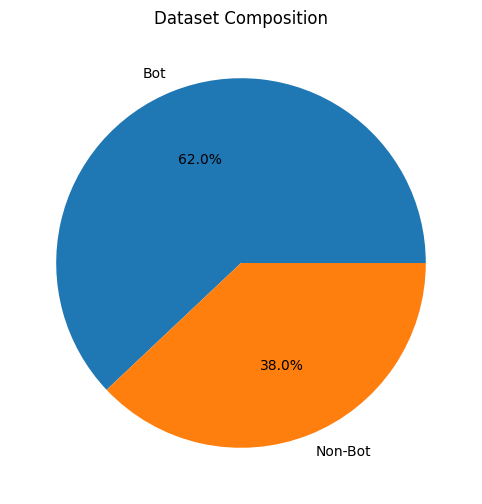


Dataset Composition:
Label
0    0.62037
1    0.37963
Name: proportion, dtype: float64


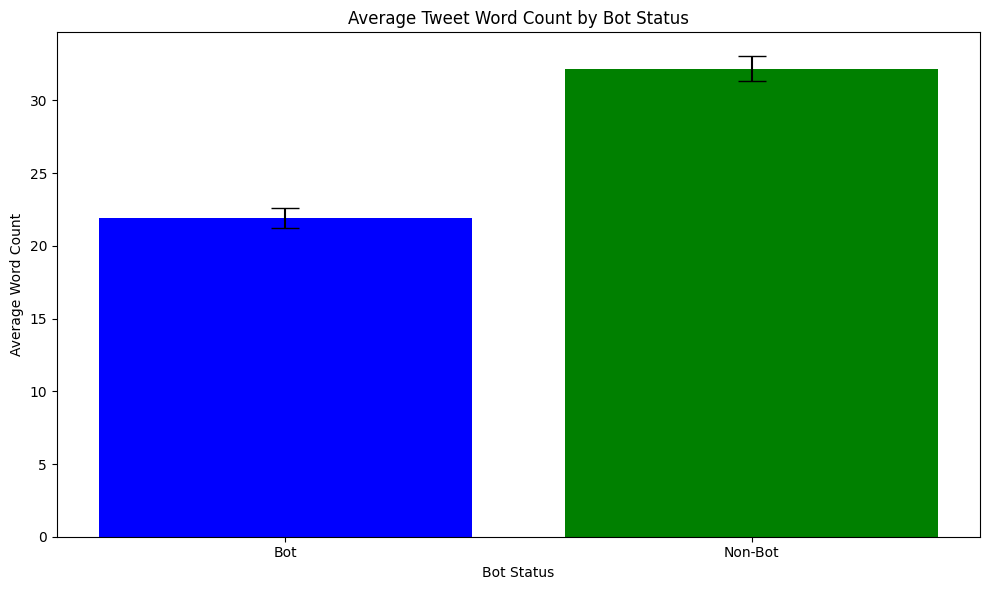


Word Count Statistics:
       count       mean        std  min   25%   50%   75%   max
Label                                                          
0      335.0  21.907463  12.789888  3.0  12.0  19.0  32.0  56.0
1      205.0  32.175610  12.240578  4.0  25.0  33.0  42.0  55.0


In [15]:
def detect_label_column(data):
    possible_columns = ['label', 'Label', 'Predicted_Label', 'bot_label']
    for col in possible_columns:
        if col in data.columns:
            return col
    raise ValueError("No label column found in the dataset")


def bot_eda(data):
    # Dynamically detect the label column
    label_column = detect_label_column(data)
    
    # 1. Dataset Composition
    def dataset_composition():
        plt.figure(figsize=(8, 6))
        label_counts = data[label_column].value_counts()
        plt.pie(label_counts, labels=['Bot', 'Non-Bot'], autopct='%1.1f%%')
        plt.title('Dataset Composition')
        plt.show()
        
        print("\nDataset Composition:")
        print(data[label_column].value_counts(normalize=True))
    
    # 2. Text Analysis
    def text_analysis():
        # Calculate word counts
        data['Word_Count'] = data['Tweet_text'].str.split().str.len()
        
        plt.figure(figsize=(10, 6))
        # Group by label and calculate mean and standard error
        word_count_summary = data.groupby(label_column)['Word_Count'].agg(['mean', 'sem'])
        
        plt.bar(word_count_summary.index.map({0: 'Bot', 1: 'Non-Bot'}), 
                word_count_summary['mean'], 
                yerr=word_count_summary['sem'], 
                capsize=10,
                color=['blue', 'green'])
        
        plt.title('Average Tweet Word Count by Bot Status')
        plt.xlabel('Bot Status')
        plt.ylabel('Average Word Count')
        plt.tight_layout()
        plt.show()
        
        # Descriptive statistics of word count
        print("\nWord Count Statistics:")
        print(data.groupby(label_column)['Word_Count'].describe())
    
    # Run all analyses
    dataset_composition()
    text_analysis()


# Execute EDA
bot_eda(data_labeled)


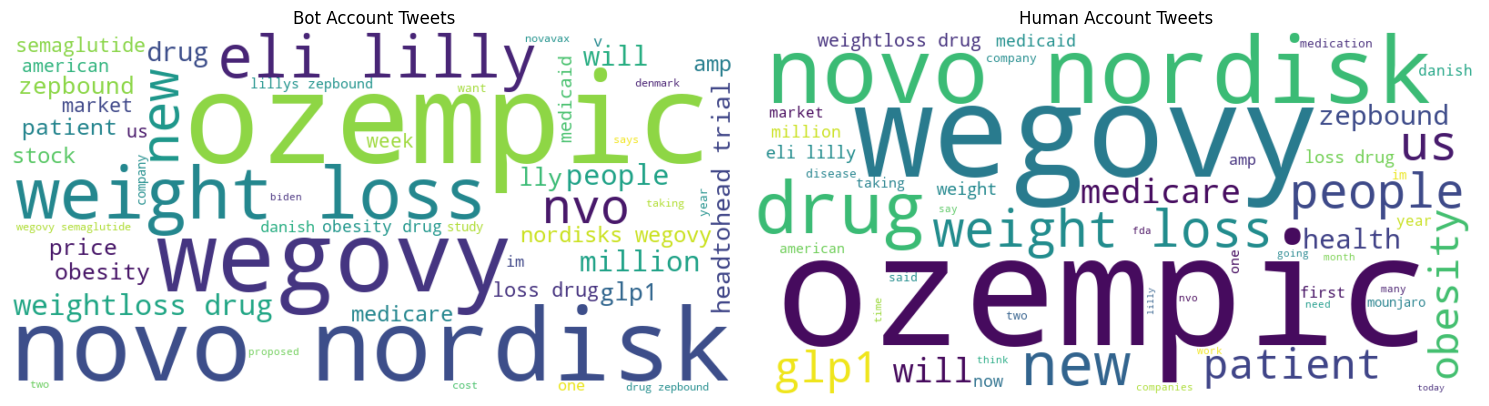

In [17]:
# Group tweets by account and keep only unique ones
unique_tweets = data_labeled.groupby('User_name')['Tweet_text'].unique().apply(lambda x: ' '.join(x))

# Separate bot and human accounts
bot_accounts = data_labeled[data_labeled['Label'] == 0]['User_name']
human_accounts = data_labeled[data_labeled['Label'] == 1]['User_name']

# Get tweets for bot and human accounts
bot_tweets = unique_tweets[bot_accounts].drop_duplicates()
human_tweets = unique_tweets[human_accounts].drop_duplicates()

# Convert tweets to text for word cloud generation
bot_text = " ".join(bot_tweets)
human_text = " ".join(human_tweets)

# Create custom stopwords (optional)
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['https', 'http', 'www', 'com'])

# Generate word clouds
bot_wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    stopwords=custom_stopwords, 
    max_words=50
).generate(bot_text)

human_wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    stopwords=custom_stopwords, 
    max_words=50
).generate(human_text)

# Plot word clouds
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(bot_wordcloud, interpolation='bilinear')
plt.title('Bot Account Tweets')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(human_wordcloud, interpolation='bilinear')
plt.title('Human Account Tweets')
plt.axis('off')

plt.tight_layout()
plt.show()

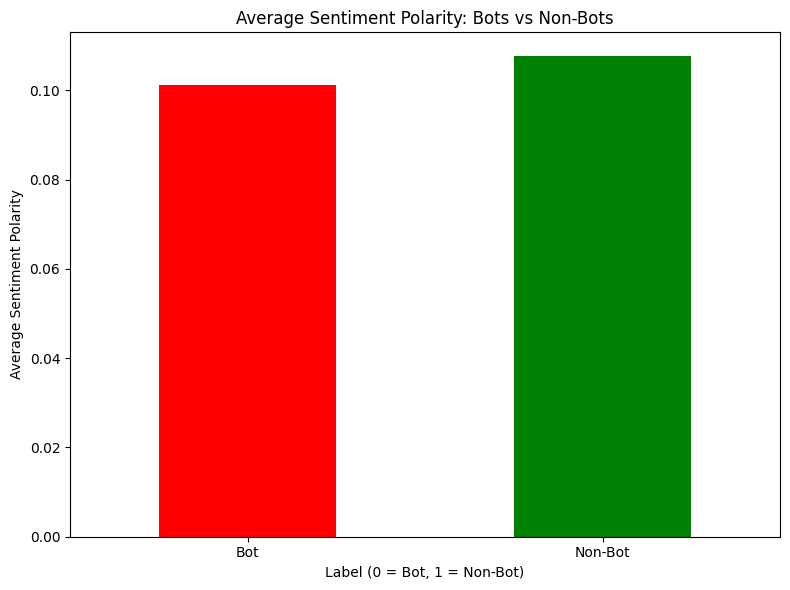

In [3]:
# Import the dataframe
df = pd.read_csv('scraped_novo_with_setfit_predictions.csv')

# Function to calculate sentiment polarity
def calculate_sentiment_polarity(text):
    if pd.notna(text):  # Check if text is not NaN
        return TextBlob(text).sentiment.polarity
    return None

# Add a new column for sentiment polarity
df['Sentiment_Polarity'] = df['Tweet_text'].apply(calculate_sentiment_polarity)

# Calculate average sentiment by label
average_sentiment = df.groupby('Label')['Sentiment_Polarity'].mean()

# Plot the result using a bar chart
plt.figure(figsize=(8, 6))
average_sentiment.plot(kind='bar', color=['red', 'green'])

# Customize the plot
plt.title('Average Sentiment Polarity: Bots vs Non-Bots')
plt.xlabel('Label (0 = Bot, 1 = Non-Bot)')
plt.ylabel('Average Sentiment Polarity')
plt.xticks([0, 1], ['Bot', 'Non-Bot'], rotation=0)
plt.tight_layout()
plt.show()

In [17]:

def top_10_users_analysis(data):
    """
    Analyzes the top 10 users based on tweet count and visualizes the results.
    """
    print("Top 10 Users Analysis:")
    print("-" * 50)
    
    # Identify Top 10 Users
    top_users = data['Screen_name'].value_counts().head(10)
    
    # Print the Top 10 Users
    print("\nTop 10 Users by Tweet Count:")
    print(top_users)
    print("-" * 50)
    
    # Visualization: Bar Chart
    print("\nGenerating Visualization...")
    fig = px.bar(
        x=top_users.index, 
        y=top_users.values, 
        title='Top 10 Users by Tweet Count',
        labels={'x': 'User', 'y': 'Number of Tweets'},
        color=top_users.values,  # Optional: Color bar by tweet count
        color_continuous_scale='Viridis'  # Optional: Color scale
    )
    fig.show()


# Execute Top 10 Users Analysis
top_10_users_analysis(data_labeled)


Top 10 Users Analysis:
--------------------------------------------------

Top 10 Users by Tweet Count:
Screen_name
Reuters            12
Forbes              8
WSJ                 8
Reuters_Health      6
JosephPolitano      6
FortuneMagazine     5
Quality_stocksA     5
CBSNews             5
business            5
USATODAY            5
Name: count, dtype: int64
--------------------------------------------------

Generating Visualization...


## Network Analysis 🧮 📊

### LLM Setup 🎛️ 

In [18]:
# Check if the API key is set
if not TOGETHER_API_KEY:
    raise ValueError("The Together API Key must be provided.")

# Initialize the Together client
client = OpenAI(
    base_url="https://api.together.xyz/v1",
    api_key=TOGETHER_API_KEY
)

# Define the model
model = "meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo"

#### Prompts 💬

In [19]:
SYSTEM_PROMPT = """
System Prompt:

You are an advanced NLP assistant tasked with analyzing tweets about a company. Each tweet is labeled as being from either a bot (0) or a human (1). Your goals are to identify themes, assess sentiment, extract keywords, and assign significance scores. Follow these steps:

Theme Identification:

- Group tweets into 5-15 overall themes or mentions about the company. Themes represent key topics, issues, or narratives surrounding the company.
- For each theme, provide subthemes or keywords that explain why the theme was chosen. These keywords should summarize the driving factors behind the theme.

Sentiment Analysis:

- Perform sentiment analysis for each tweet and aggregate these sentiments to determine the overall sentiment for each theme (positive, neutral, or negative).
- Provide an average sentiment score (-1 to +1 scale) for each theme.

Theme Significance:

- Assign a significance score (1-100) for each theme based on how many tweets contribute to it, and other relevant metrics (e.g., impact of subthemes, relevance to overall narrative).

Output Structure:

For each theme, provide:
- Theme title.
- Sentiment summary (positive/negative/neutral, average sentiment score).
- Subthemes/keywords explaining the causation of the theme.
- Significance score.


Consideration:

- Focus on human-labeled tweets (1) for primary analysis but note any notable patterns from bot-labeled tweets (0).
- Highlight anomalies or unexpected findings, if any.
"""


In [20]:
json_schema = {
    "type": "object",
    "properties": {
        "themes": {
            "type": "array",
            "items": {
                "type": "object",
                "properties": {
                    "theme": {
                        "type": "string",
                        "description": "Title of the overall theme"
                    },
                    "sentiment": {
                        "type": "object",
                        "properties": {
                            "overall": {
                                "type": "string",
                                "enum": ["positive", "neutral", "negative"],
                                "description": "Overall sentiment of the theme"
                            },
                            "average_score": {
                                "type": "number",
                                "minimum": -1,
                                "maximum": 1,
                                "description": "Average sentiment score of the theme"
                            }
                        },
                        "required": ["overall", "average_score"]
                    },
                    "subthemes": {
                        "type": "array",
                        "items": {
                            "type": "string"
                        },
                        "description": "List of keywords or subthemes driving the main theme"
                    },
                    "significance": {
                        "type": "integer",
                        "minimum": 1,
                        "maximum": 100,
                        "description": "Significance score of the theme"
                    }
                },
                "required": ["theme", "sentiment", "subthemes", "significance"]
            }
        }
    },
    "required": ["themes"]
}


In [21]:
class Sentiment(BaseModel):
    overall: str = Field(
        description="Overall sentiment of the theme",
        enum=["positive", "neutral", "negative"]
    )
    average_score: float = Field(
        description="Average sentiment score of the theme",
        ge=-1,
        le=1
    )

class Theme(BaseModel):
    theme: str = Field(description="Title of the overall theme")
    sentiment: Sentiment = Field(description="Sentiment of the theme")
    subthemes: List[str] = Field(
        description="List of keywords or subthemes driving the main theme"
    )
    significance: int = Field(
        description="Significance score of the theme",
        ge=1,
        le=100
    )

class TweetAnalysis(BaseModel):
    themes: List[Theme] = Field(
        description="List of identified overall themes",
        min_items=1
    )

# Dynamically generate the JSON schema
json_schema = TweetAnalysis.model_json_schema()

/Users/hedegaard/Downloads/content/setfit_model/.conda/lib/python3.12/site-packages/pydantic/fields.py:1032: PydanticDeprecatedSince20:

Using extra keyword arguments on `Field` is deprecated and will be removed. Use `json_schema_extra` instead. (Extra keys: 'enum'). Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/

/Users/hedegaard/Downloads/content/setfit_model/.conda/lib/python3.12/site-packages/pydantic/fields.py:1001: PydanticDeprecatedSince20:

`min_items` is deprecated and will be removed, use `min_length` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/



### LLM-processing (TogetherAPI - Runtime: Aprox. <=2min) 🤖 🦾

In [22]:
# Split Labeled data of humans & bots (`label` column)

data_label_bots = data_labeled[data_labeled['Label'] == 0]  # Subset where label=0
data_label_humans = data_labeled[data_labeled['Label'] == 1]  # Subset where label=1

# checking the sizes of the splits
print(f"Data labeled as 'bots' (label=0): {len(data_label_humans)} rows")
print(f"Data labeled as 'human'(label=1): {len(data_label_bots)} rows")

# define LLM functions
def rate_limited_executor(max_calls_per_minute=100):
    """Rate-limited executor for API calls."""
    call_queue = Queue()

    def worker():
        while True:
            func, args, kwargs, result_queue = call_queue.get()
            try:
                result_queue.put(func(*args, **kwargs))
            except Exception as e:
                result_queue.put(e)
            call_queue.task_done()
            time.sleep(60 / max_calls_per_minute)

    for _ in range(max_calls_per_minute):
        threading.Thread(target=worker, daemon=True).start()

    def submit(func, *args, **kwargs):
        result_queue = Queue()
        call_queue.put((func, args, kwargs, result_queue))
        result = result_queue.get()
        if isinstance(result, Exception):
            raise result
        return result

    return submit

def process_batch(tweets, executor, model, schema, batch_size):
    """Process one batch of tweets."""
    messages = [
        {'role': 'system', 'content': SYSTEM_PROMPT},
        {'role': 'user', 'content': json.dumps(tweets)}
    ]
    try:
        response = executor(
            client.chat.completions.create,
            model=model,
            messages=messages,
            temperature=0.7,
            response_format={"type": "json_object", "schema": schema},
            max_tokens=8192
        )
        return {
            'batch_size': len(tweets),
            'response': response.choices[0].message.content
        }
    except Exception as e:
        return {
            'batch_size': len(tweets),
            'error': str(e)
        }




def parallel_process_tweets(data, batch_size, max_workers, model, schema):
    """Parallel processing of tweets with rate-limiting."""
    executor = rate_limited_executor(max_calls_per_minute=60)
    results = []




    def process_and_collect(batch):
        tweets = batch['Tweet_text'].tolist()
        return process_batch(tweets, executor, model, schema, batch_size)




    with ThreadPoolExecutor(max_workers=max_workers) as pool:
        batches = [data.iloc[i:i + batch_size] for i in range(0, len(data), batch_size)]
        futures = [pool.submit(process_and_collect, batch) for batch in batches]
        for future in futures:
            results.append(future.result())




    return pd.DataFrame(results)




def save_results(data, filename):
    """Save data to JSON file."""
    try:
        with open(filename, 'w', encoding='utf-8') as f:
            json.dump(data, f, ensure_ascii=False, indent=4)
        print(f"Results saved in {filename}")
    except Exception as e:
        print(f"Error during saving: {e}")


###### RUN BOT FILTERED LLM & SAVE ######

# llm processing of data with bots only
processed_tweets = parallel_process_tweets(
    data=data_label_bots,  # data (bots only)
    batch_size=10,      # Batch size
    max_workers=6,     # Number of parallel threads
    model=model,        # Your model variable
    schema=json_schema  # Your JSON schema variable
)

# save the results to novo_bots.json (bot)
save_results(processed_tweets.to_dict(orient="records"), "novo_bots_llm_processed.json")

###### RUN HUMAN FILTERED LLM & SAVE ######

# llm processing of data with humans only
processed_tweets = parallel_process_tweets(
    data=data_label_humans,  # data (humans only)
    batch_size=10,      # Batch size
    max_workers=6,     # Number of parallel threads
    model=model,        # Your model variable
    schema=json_schema  # Your JSON schema variable
)

# saving the results to novo_humans.json (humans)
save_results(processed_tweets.to_dict(orient="records"), "novo_humans_llm_processed.json")

Data labeled as 'bots' (label=0): 205 rows
Data labeled as 'human'(label=1): 335 rows
Results saved in novo_bots_llm_processed.json
Results saved in novo_humans_llm_processed.json


## Theme Analysis Graph 🎨 🖼️

In [26]:
# Import LLM processed json data
bot_data = json.load(open('novo_bots_llm_processed.json'))
nonbot_data = json.load(open('novo_humans_llm_processed.json'))

# define theme analysis functions
def create_theme_network(data_bot, data_nonbot, min_significance=70):
    """Create a network graph from themes with a minimum significance level."""
    G = nx.Graph()

    def process_data(data, is_bot=True):
        for item in data:
            response = item.get('response')
            if isinstance(response, str):
                try:
                    response_data = json.loads(response)
                    themes = response_data.get('themes', [])

                    for theme in themes:
                        significance = theme.get('significance', 0)
                        if significance >= min_significance:
                            theme_name = theme['theme']
                            sentiment = theme.get('sentiment', {})
                            average_score = sentiment.get('average_score', 0)

                            # Classify sentiment based on average score
                            sentiment_class = "positive" if average_score > 0 else "negative"
                            
                            subthemes = theme.get('subthemes', [])

                            # Add or update theme node
                            if not G.has_node(theme_name):
                                G.add_node(theme_name,
                                           type='theme',
                                           is_bot=is_bot,
                                           significance=significance,
                                           sentiment_class=sentiment_class,
                                           average_score=average_score,
                                           subthemes=subthemes)
                            else:
                                # If node exists and bot status is different, mark as mixed
                                current_bot_status = G.nodes[theme_name].get('is_bot')
                                if current_bot_status != is_bot:
                                    G.nodes[theme_name]['is_bot'] = 'mixed'

                except json.JSONDecodeError:
                    print(f"Invalid JSON in response: {response}")

    # Process bot and non-bot data
    process_data(data_bot, is_bot=True)
    process_data(data_nonbot, is_bot=False)

    return G
def visualize_network(G):
    """Visualize bot, non-bot, and mixed themes in clustered regions."""
    bot_nodes = [node for node, data in G.nodes(data=True) if data.get('is_bot') == True]
    nonbot_nodes = [node for node, data in G.nodes(data=True) if data.get('is_bot') == False]
    mixed_nodes = [node for node, data in G.nodes(data=True) if data.get('is_bot') == 'mixed']

    traces = []

    def get_node_size(significance):
        return 10 + (significance / 5)

    def get_node_color(is_bot, sentiment_class):
        if is_bot and sentiment_class == 'positive':
            return 'rgb(34,139,34)'  # green color for positive bot
        elif is_bot and sentiment_class == 'negative':
            return 'rgb(255,69,0)'  # red for negative bot
        elif not is_bot and sentiment_class == 'positive':
            return 'rgb(30,144,255)'  # blue for positive non-bot
        elif not is_bot and sentiment_class == 'negative':
            return 'rgb(255,99,71)'  # tomato-red-ish, for negative non-bot

    for nodes, loc in [(bot_nodes, (-10, -10)), (nonbot_nodes, (10, 10)), (mixed_nodes, (0, 0))]:
        if nodes:
            x = np.random.normal(loc=loc[0], scale=3, size=len(nodes))
            y = np.random.normal(loc=loc[1], scale=3, size=len(nodes))
            sizes = [get_node_size(G.nodes[node]['significance']) for node in nodes]
            colors = [get_node_color(G.nodes[node]['is_bot'], G.nodes[node]['sentiment_class']) for node in nodes]
            hover_texts = [
                f"Theme: {node}<br>Type: {'Bot' if G.nodes[node]['is_bot'] == True else 'Non-Bot'}<br>"
                f"Significance: {G.nodes[node]['significance']}%<br>"
                f"Subthemes: {', '.join(G.nodes[node].get('subthemes', []))}<br>"
                f"Sentiment: {G.nodes[node]['sentiment_class']}<br>"
                f"Average Score: {G.nodes[node]['average_score']}"
                for node in nodes
            ]
            traces.append(go.Scatter(
                x=x, y=y, mode='markers', hovertext=hover_texts, hoverinfo='text',
                marker=dict(size=sizes, color=colors, line=dict(width=1, color='black'))
            ))

    fig = go.Figure(data=traces)
    fig.update_layout(
        title="Novo Nordisk Twitter Mention Visualization",
        showlegend=False,  # Disable automatic legend
        hovermode='closest',
        width=1000, height=800,
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        plot_bgcolor='rgb(240,240,240)',
        annotations=[
            dict(
                x=1, y=1.05, showarrow=False, text=(
                    "<b>Legend:</b><br>"
                    "<span style='color:rgb(34,139,34)'>● Positive Bot</span><br>"
                    "<span style='color:rgb(255,69,0)'>● Negative Bot</span><br>"
                    "<span style='color:rgb(30,144,255)'>● Positive Non-Bot</span><br>"
                    "<span style='color:rgb(255,99,71)'>● Negative Non-Bot</span>"
                ),
                xref="paper", yref="paper", align="left", bgcolor="rgba(255,255,255,0.7)",
                bordercolor="black", borderwidth=1
            )
        ]
    )

    fig.show()
if __name__ == "__main__":
    graph = create_theme_network(bot_data, nonbot_data, min_significance=80)
    visualize_network(graph)

In [20]:
def load_json_file(file_path):
    """Load JSON file safely."""
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            return json.load(file)
    except Exception as e:
        print(f"Error loading JSON file {file_path}: {e}")
        return []

def extract_negative_sentiments(data, min_significance=80):
    """Extract all negative sentiments with significance above the threshold."""
    negative_sentiments = []

    for item in data:
        response = item.get('response')
        if isinstance(response, str):
            try:
                response_data = json.loads(response)
                themes = response_data.get('themes', [])

                for theme in themes:
                    significance = theme.get('significance', 0)
                    if significance >= min_significance:
                        theme_name = theme['theme']
                        sentiment = theme.get('sentiment', {})
                        average_score = sentiment.get('average_score', 0)

                        # Check if sentiment is negative
                        if average_score < 0:
                            negative_sentiments.append({
                                "theme": theme_name,
                                "significance": significance,
                                "average_score": average_score,
                                "subthemes": theme.get('subthemes', [])
                            })
            except json.JSONDecodeError:
                print(f"Invalid JSON in response: {response}")
    
    return negative_sentiments

if __name__ == "__main__":

    # Extract negative sentiments with significance above 80%
    negative_bot_sentiments = extract_negative_sentiments(bot_data, min_significance=80)
    negative_nonbot_sentiments = extract_negative_sentiments(nonbot_data, min_significance=85)

    # Print the negative sentiments
    print("Negative Sentiments (Bot Data):")
    for sentiment in negative_bot_sentiments:
        print(f"Theme: {sentiment['theme']}, Significance: {sentiment['significance']}%, Average Score: {sentiment['average_score']}")

    print("\nNegative Sentiments (Non-Bot Data):")
    for sentiment in negative_nonbot_sentiments:
        print(f"Theme: {sentiment['theme']}, Significance: {sentiment['significance']}%, Average Score: {sentiment['average_score']}")


Negative Sentiments (Bot Data):
Theme: Competition in the Pharmaceutical Market, Significance: 85%, Average Score: -0.45
Theme: Healthcare Policy and Regulation, Significance: 90%, Average Score: -0.62
Theme: Medicine Prices and Affordability, Significance: 80%, Average Score: -0.55
Theme: Novo Nordisk's Weight Loss Drug WeGovy, Significance: 80%, Average Score: -0.6
Theme: Antitrust Groups and Competitors, Significance: 80%, Average Score: -0.8
Theme: Robert Kennedy's Health Agency Nomination, Significance: 95%, Average Score: -0.9
Theme: Competition in the Weight Loss Market, Significance: 80%, Average Score: -0.56
Theme: Novo Nordisk Corporate Issues, Significance: 80%, Average Score: -0.71
Theme: Ozempic and Pharmaceutical Industry, Significance: 80%, Average Score: -0.68
Theme: Ozempic Side Effects, Significance: 90%, Average Score: -0.9
Theme: Ozempic Weight Loss, Significance: 85%, Average Score: -0.67
Theme: Ozempic Accessibility, Significance: 92%, Average Score: -0.83
Theme: 